# 🔷 Sección: 01 Intro Analisis Diabetes

# Introducción al problema de regresión con datos de diabetes
Este notebook explora un problema clásico de regresión utilizando el conjunto de datos de diabetes incluido en `scikit-learn`. Este análisis es previo al estudio de técnicas de regularización como Ridge, Lasso y Elastic Net, y tiene como propósito entender las características del conjunto de datos, su estructura, y las motivaciones para aplicar técnicas de penalización.


## ¿Qué es el conjunto de datos de diabetes?
- El conjunto incluye 442 muestras de pacientes.
- Cada muestra tiene 10 características clínicas: edad, sexo, índice de masa corporal (IMC), presión arterial, etc.
- Las variables predictoras han sido estandarizadas.
- El objetivo (`y`) es una medida cuantitativa de la progresión de la diabetes un año después del diagnóstico.

Este es un problema de **regresión multivariada**.


## ¿Por qué no basta con regresión lineal ordinaria?
- Cuando hay **colinealidad** entre las variables predictoras, la matriz \( X^T X \) puede volverse casi singular.
- Esto genera **coeficientes inestables** y alta **varianza en las predicciones**.
- En contextos con muchas variables o pocos datos, el modelo clásico **sobreajusta** fácilmente.
- Las técnicas de regularización ayudan a controlar esto penalizando la complejidad del modelo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Cargar dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='disease_progression')
df = X.copy()
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Distribución de la variable objetivo

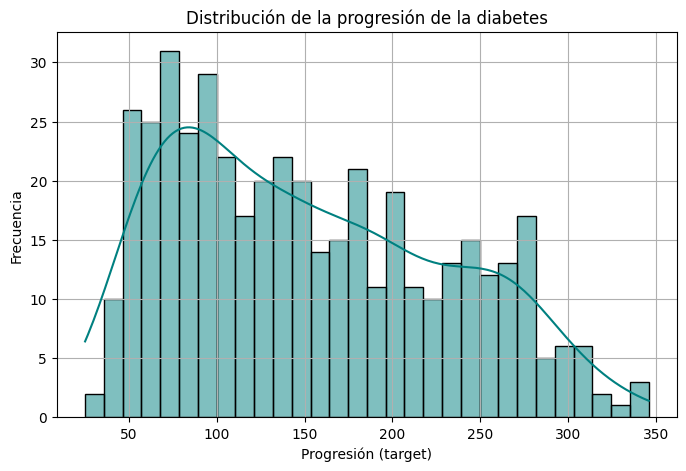

In [2]:
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30, color='teal')
plt.title('Distribución de la progresión de la diabetes')
plt.xlabel('Progresión (target)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## Correlación entre variables predictoras

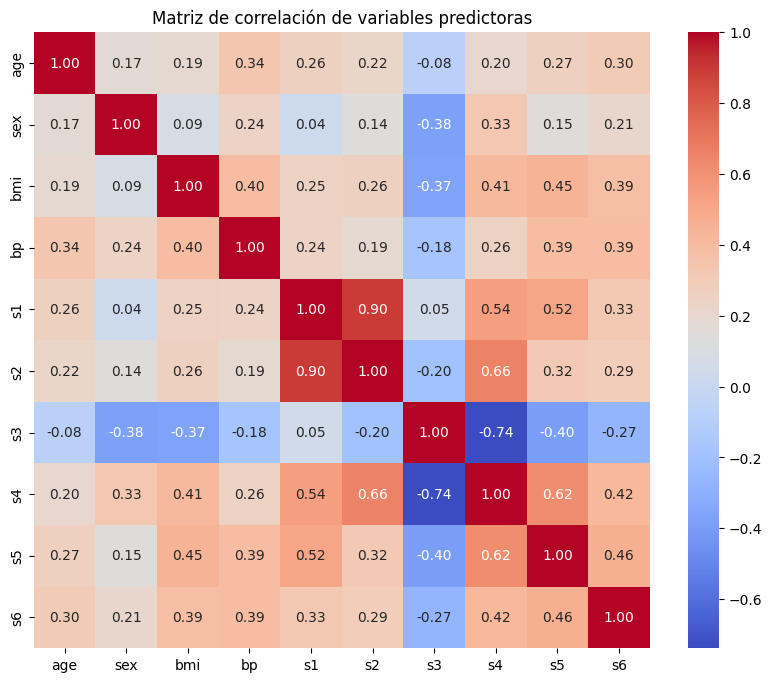

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de correlación de variables predictoras')
plt.show()

## Ejemplo de colinealidad entre variables

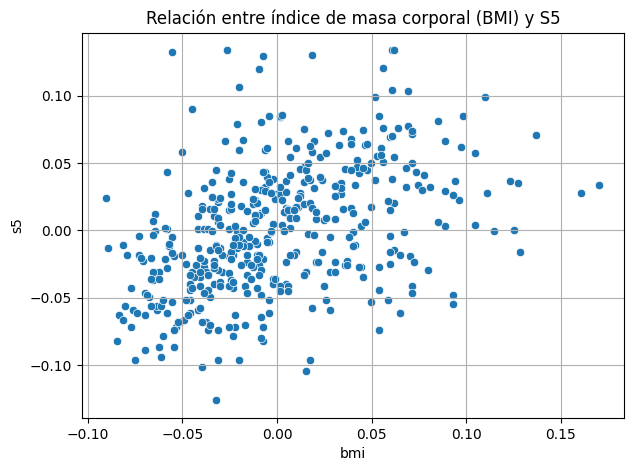

In [4]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X['bmi'], y=X['s5'])
plt.title('Relación entre índice de masa corporal (BMI) y S5')
plt.xlabel('bmi')
plt.ylabel('s5')
plt.grid(True)
plt.show()

## Conclusión
Este análisis exploratorio muestra la necesidad de técnicas que mitiguen problemas de varianza alta, multicolinealidad y sobreajuste.
A continuación, exploraremos modelos de regresión regularizada como Ridge, Lasso y Elastic Net para abordar estos desafíos.

# 🔷 Sección: Ridge Regression

# Regresión Ridge: Teoría y Aplicación

Este notebook aborda con profundidad la regresión Ridge, incluyendo su motivación, formulación matemática, comparación con OLS, análisis estadístico del modelo y aplicaciones modernas.

## 1. ¿Por qué regularizar?

- En regresión clásica (OLS), si los predictores están altamente correlacionados (colinealidad), la matriz $X^TX$ se vuelve casi singular.
- Esto provoca que pequeños cambios en los datos generen grandes variaciones en los coeficientes.
- Ridge penaliza los coeficientes grandes para reducir la **varianza** del estimador.

### Problemas comunes en OLS:
- Alta varianza en coeficientes
- Sobreajuste (overfitting)
- Inestabilidad numérica


## 2. Fundamento teórico
La regresión Ridge minimiza:
$$\text{min} \left\{ \| y - X\beta \|^2 + \lambda \|\beta\|_2^2 \right\}$$

Donde:
- $\|\beta\|_2^2 = \sum_j \beta_j^2$ es la norma L2
- $\lambda$ controla la intensidad de la penalización

### Solución analítica:
$$\hat{\beta}_{\text{ridge}} = (X^TX + \lambda I)^{-1} X^Ty$$

Cuando $\lambda=0$ se recupera OLS; cuando $\lambda\to\infty$ los coeficientes se acercan a cero.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

In [6]:
# Cargar y escalar datos
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Ajustar Ridge y OLS
ridge = Ridge(alpha=10.0).fit(X_train_scaled, y_train)
ols = LinearRegression().fit(X_train_scaled, y_train)

# Predicción
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_ols = ols.predict(X_test_scaled)

# Errores
print("Ridge:", mean_squared_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge))
print("OLS:", mean_squared_error(y_test, y_pred_ols), r2_score(y_test, y_pred_ols))

Ridge: 3186.95132939815 0.3580407306099934
OLS: 3180.159648155844 0.35940880381777096


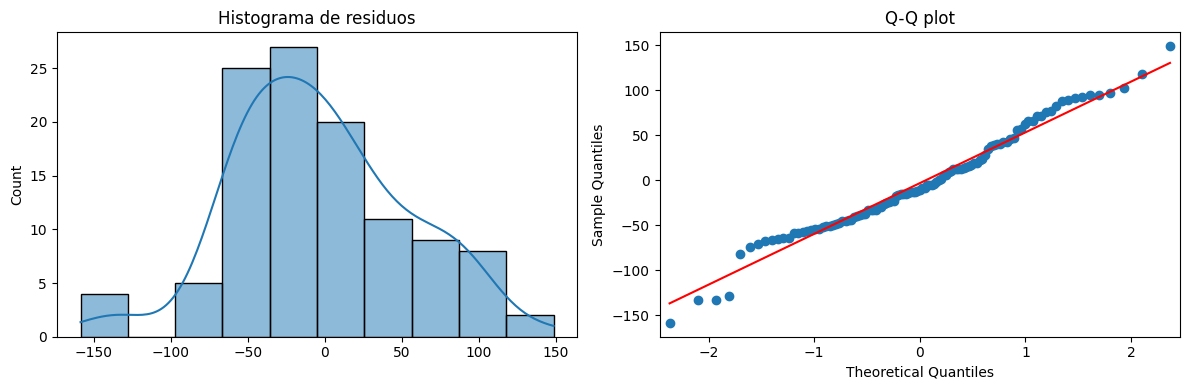

Shapiro-Wilk p-valor: 0.10273221735180332


In [8]:
# Análisis de residuos de Ridge
residuals = y_test - y_pred_ridge

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(residuals, kde=True, ax=ax[0])
sm.qqplot(residuals, line='s', ax=ax[1])
ax[0].set_title("Histograma de residuos")
ax[1].set_title("Q-Q plot")
plt.tight_layout()
plt.show()

# Test de normalidad
stat, p = shapiro(residuals)
print("Shapiro-Wilk p-valor:", p)

## 3. Exploración de coeficientes vs \( \lambda \)
Vamos a observar cómo cambian los coeficientes al aumentar la regularización.

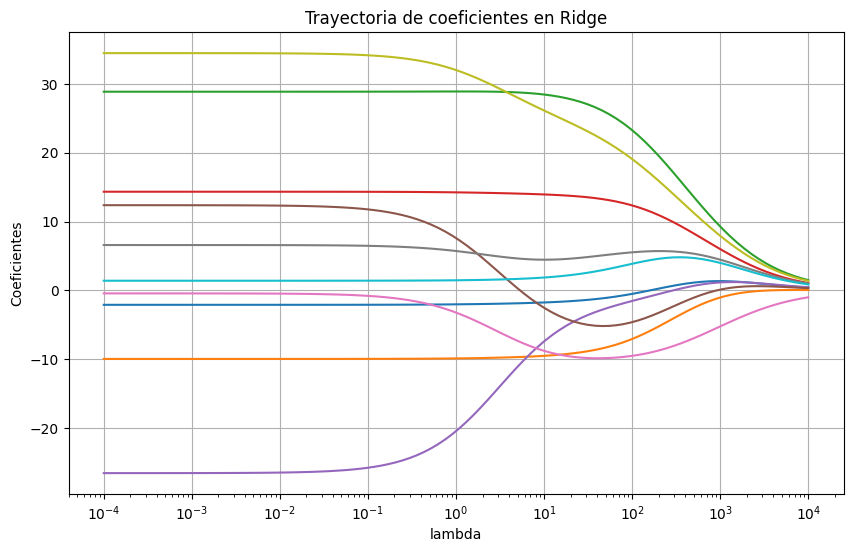

In [9]:
alphas = np.logspace(-4, 4, 100)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a).fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("Coeficientes")
plt.title("Trayectoria de coeficientes en Ridge")
plt.grid(True)
plt.show()

## 4. Conclusión y aplicaciones
- Ridge estabiliza los coeficientes y reduce sobreajuste
- Ideal cuando hay colinealidad entre predictores
- Se usa hoy en día en genética, finanzas, modelos predictivos complejos
- Base para técnicas más avanzadas como Kernel Ridge y regularización en redes neuronales

# 🔷 Sección: Lasso Regression

# Regresión Lasso: Teoría y Aplicación

Este notebook explora la regresión Lasso, con énfasis en su capacidad de seleccionar variables, teoría subyacente, implementación práctica y análisis del modelo resultante.

## 1. ¿Por qué usar Lasso?

- Ridge regulariza pero **no elimina** variables.
- En modelos con muchas variables, puede ser útil seleccionar un subconjunto relevante.
- Lasso usa penalización L1, lo que favorece soluciones **esparsas** (muchos coeficientes en cero).


## 2. Fundamento teórico
La regresión Lasso minimiza:
$$\text{min} \left\{ \| y - X\beta \|^2 + \lambda \|\beta\|_1 \right\}$$

- $\|\beta\|_1 = \sum_j |\beta_j|$ es la norma L1.
- $\lambda$ controla la penalización.
- Lasso puede poner algunos $\beta_j = 0$ si no aportan al modelo.

**Interpretación geométrica:** región de penalización en forma de diamante → intersecciones en ejes → coeficientes nulos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

In [ ]:
# Preparar datos
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Ajustar Lasso y OLS
lasso = Lasso(alpha=0.1, max_iter=10000).fit(X_train_scaled, y_train)
ols = LinearRegression().fit(X_train_scaled, y_train)

# Predicción
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_ols = ols.predict(X_test_scaled)

# Errores
print("Lasso:", mean_squared_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso))
print("OLS:", mean_squared_error(y_test, y_pred_ols), r2_score(y_test, y_pred_ols))

In [ ]:
# Coeficientes
print("Coeficientes Lasso:", lasso.coef_)
print("Coeficientes OLS:", ols.coef_)

In [ ]:
# Gráfico de coeficientes
plt.figure(figsize=(10, 5))
plt.plot(lasso.coef_, label='Lasso')
plt.plot(ols.coef_, label='OLS')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.title("Coeficientes estimados por Lasso vs OLS")
plt.xlabel("Índice de variable")
plt.ylabel("Valor del coeficiente")
plt.grid(True)
plt.show()

## 3. Análisis de residuos y supuestos
Analizamos normalidad, homocedasticidad y comportamiento de errores.

In [ ]:
# Residuos de Lasso
residuals = y_test - y_pred_lasso

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(residuals, kde=True, ax=ax[0])
sm.qqplot(residuals, line='s', ax=ax[1])
ax[0].set_title("Histograma de residuos")
ax[1].set_title("Q-Q plot")
plt.tight_layout()
plt.show()

# Test de normalidad
stat, p = shapiro(residuals)
print("Shapiro-Wilk p-valor:", p)

## 4. Trayectorias de coeficientes con \( \lambda \)
Exploramos cómo los coeficientes se vuelven cero conforme aumenta la regularización.

In [ ]:
alphas = np.logspace(-4, 0.5, 100)
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000).fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("lambda")
plt.ylabel("Coeficientes")
plt.title("Trayectoria de coeficientes en Lasso")
plt.grid(True)
plt.show()

## 5. Conclusión y aplicaciones
- Lasso es útil para selección de variables y simplificación del modelo
- Es popular en modelos donde $p \gg n$
- Se utiliza en genética, procesamiento de señales, ciencia de datos y econometría
- Puede combinarse con Elastic Net para mejorar estabilidad cuando hay colinealidad

# 🔷 Sección: Elasticnet Regression

# Regresión Elastic Net: Teoría y Aplicación

Este notebook explora la regresión Elastic Net, combinando los beneficios de Ridge y Lasso, con teoría, implementación práctica y análisis estadístico del modelo.

## 1. ¿Por qué usar Elastic Net?

- Ridge: buena para colinealidad, pero no hace selección.
- Lasso: selecciona variables, pero puede ser inestable si hay variables altamente correlacionadas.
- **Elastic Net combina ambas**: selección y agrupamiento de coeficientes correlacionados.


## 2. Fundamento teórico
Elastic Net minimiza:
$$\text{min} \left\{ \| y - X\beta \|^2 + \lambda_1 \|\beta\|_1 + \lambda_2 \|\beta\|_2^2 \right\}$$

En `scikit-learn`, se parametriza como:
- `alpha`: controla la fuerza total de regularización
- `l1_ratio`: pondera entre Lasso (`1.0`) y Ridge (`0.0`)

Elastic Net tiende a:
- Seleccionar grupos de variables correlacionadas
- Mantener estabilidad frente a colinealidad

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

In [ ]:
# Preparar datos
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Ajustar Elastic Net
enet = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000).fit(X_train_scaled, y_train)
ols = LinearRegression().fit(X_train_scaled, y_train)

y_pred_enet = enet.predict(X_test_scaled)
y_pred_ols = ols.predict(X_test_scaled)

# Errores
print("Elastic Net:", mean_squared_error(y_test, y_pred_enet), r2_score(y_test, y_pred_enet))
print("OLS:", mean_squared_error(y_test, y_pred_ols), r2_score(y_test, y_pred_ols))

In [ ]:
# Visualización de coeficientes
plt.figure(figsize=(10, 5))
plt.plot(enet.coef_, label='Elastic Net')
plt.plot(ols.coef_, label='OLS')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Coeficientes: Elastic Net vs OLS")
plt.legend()
plt.grid(True)
plt.show()

## 3. Análisis de residuos y supuestos
Evaluamos los errores del modelo Elastic Net para validar su consistencia estadística.

In [ ]:
# Análisis de residuos
residuals = y_test - y_pred_enet

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(residuals, kde=True, ax=ax[0])
sm.qqplot(residuals, line='s', ax=ax[1])
ax[0].set_title("Histograma de residuos")
ax[1].set_title("Q-Q plot")
plt.tight_layout()
plt.show()

# Shapiro-Wilk
stat, p = shapiro(residuals)
print("Shapiro-Wilk p-valor:", p)

## 4. Exploración de l1_ratio
Cómo cambian los coeficientes al variar la mezcla entre L1 y L2.

In [ ]:
l1_ratios = np.linspace(0.01, 1.0, 20)
coefs = []
for ratio in l1_ratios:
    en = ElasticNet(alpha=0.1, l1_ratio=ratio, max_iter=10000).fit(X_train_scaled, y_train)
    coefs.append(en.coef_)

plt.figure(figsize=(10, 6))
plt.plot(l1_ratios, coefs)
plt.xlabel("l1_ratio")
plt.ylabel("Coeficientes")
plt.title("Evolución de coeficientes en Elastic Net")
plt.grid(True)
plt.show()

## 5. Conclusión y aplicaciones
- Elastic Net combina selección de Lasso y estabilidad de Ridge
- Se adapta bien cuando hay muchas variables correlacionadas
- Muy usado en modelos genómicos, selección de atributos y análisis multivariante
- Permite control fino de la estructura del modelo mediante `l1_ratio` y `alpha`

# 🔷 Sección: Comparacion Modelos Regularizados

# Comparación de Regresiones Regularizadas: Ridge, Lasso y Elastic Net

Este notebook compara el comportamiento, coeficientes, rendimiento y supuestos de los modelos de regresión regularizada Ridge, Lasso y Elastic Net, usando el mismo conjunto de datos estandarizado.

## 1. Cargar y preparar datos
Usaremos el conjunto de datos de diabetes de `sklearn` y lo dividiremos en entrenamiento y prueba.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Ajuste de modelos
Utilizaremos valores de hiperparámetros fijos comparables.

In [ ]:
# Modelos
ridge = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
lasso = Lasso(alpha=0.1, max_iter=10000).fit(X_train_scaled, y_train)
enet = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000).fit(X_train_scaled, y_train)

# Predicciones
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_enet = enet.predict(X_test_scaled)

# Errores
def resumen(nombre, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{nombre} → RMSE: {rmse:.3f}, R2: {r2:.3f}")

resumen("Ridge", y_test, y_pred_ridge)
resumen("Lasso", y_test, y_pred_lasso)
resumen("Elastic Net", y_test, y_pred_enet)

## 3. Comparación de coeficientes
Visualizamos las diferencias en magnitud y sparsity.

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ridge.coef_, label='Ridge')
plt.plot(lasso.coef_, label='Lasso')
plt.plot(enet.coef_, label='Elastic Net')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Índice de variable")
plt.ylabel("Coeficiente")
plt.title("Coeficientes estimados")
plt.legend()
plt.grid(True)
plt.show()

## 4. Número de coeficientes distintos de cero
Esto mide cuán esparso es el modelo (selección de variables).

In [ ]:
print("Coef. distintos de cero:")
print("Ridge:", np.sum(ridge.coef_ != 0))
print("Lasso:", np.sum(lasso.coef_ != 0))
print("Elastic Net:", np.sum(enet.coef_ != 0))

## ✅ Conclusiones
- **Ridge** mantiene todos los coeficientes pequeños → útil con multicolinealidad.
- **Lasso** realiza selección de variables automática.
- **Elastic Net** balancea ambos efectos, útil con muchas variables correlacionadas.

## 🕰️ Historia de los métodos
| Método        | Año  | Creador(es)             | Motivación principal                          |
|---------------|------|--------------------------|------------------------------------------------|
| **Ridge**     | 1970 | Hoerl & Kennard          | Estabilizar estimaciones con colinealidad     |
| **Lasso**     | 1996 | Robert Tibshirani        | Selección automática de variables             |
| **Elastic Net** | 2005 | Zou & Hastie            | Combinar estabilidad y esparsidad             |

## 🧾 Origen de los nombres
- **Ridge**: “Cresta” que estabiliza soluciones ante colinealidad.
- **Lasso**: Acrónimo de *Least Absolute Shrinkage and Selection Operator*.
- **Elastic Net**: Red elástica que combina propiedades de Ridge y Lasso.

## 5. Optimización del hiperparámetro \( \lambda \) (alpha)
Utilizaremos `GridSearchCV` para encontrar el mejor valor de `alpha` para el modelo Ridge usando validación cruzada.

In [11]:
from sklearn.model_selection import GridSearchCV

# Definir el rango de alphas a buscar
param_grid = {'alpha': np.logspace(-4, 4, 100)}

# Configurar GridSearchCV
# cv=5 indica 5-fold cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar en los datos de entrenamiento escalados
grid_search.fit(X_train_scaled, y_train)

# Mejor alpha y mejor score
mejor_alpha = grid_search.best_params_['alpha']
mejor_rmse = np.sqrt(-grid_search.best_score_)

print(f"Mejor alpha encontrado por GridSearchCV: {mejor_alpha:.4f}")
print(f"Mejor RMSE en validación cruzada: {mejor_rmse:.4f}")

# Ajustar el modelo Ridge final con el mejor alpha
ridge_optimo = Ridge(alpha=mejor_alpha).fit(X_train_scaled, y_train)

# Evaluar en el conjunto de test
y_pred_ridge_optimo = ridge_optimo.predict(X_test_scaled)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_optimo))
r2_test = r2_score(y_test, y_pred_ridge_optimo)

print(f"RMSE en el conjunto de test (con mejor alpha): {rmse_test:.3f}")
print(f"R2 en el conjunto de test (con mejor alpha): {r2_test:.3f}")

Mejor alpha encontrado por GridSearchCV: 31.2572
Mejor RMSE en validación cruzada: 54.6851
RMSE en el conjunto de test (con mejor alpha): 56.111
R2 en el conjunto de test (con mejor alpha): 0.366


## 6. Optimización del hiperparámetro \( \lambda \) (alpha) para Lasso
Ahora optimizaremos el hiperparámetro `alpha` para el modelo Lasso.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Definir el rango de alphas a buscar
param_grid_lasso = {'alpha': np.logspace(-4, 4, 100)}

# Configurar GridSearchCV para Lasso
grid_search_lasso = GridSearchCV(Lasso(max_iter=10000), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Ajustar en los datos de entrenamiento escalados
grid_search_lasso.fit(X_train_scaled, y_train)

# Mejor alpha y mejor score para Lasso
mejor_alpha_lasso = grid_search_lasso.best_params_['alpha']
mejor_rmse_lasso = np.sqrt(-grid_search_lasso.best_score_)

print(f"Mejor alpha encontrado por GridSearchCV para Lasso: {mejor_alpha_lasso:.4f}")
print(f"Mejor RMSE en validación cruzada para Lasso: {mejor_rmse_lasso:.4f}")

# Ajustar el modelo Lasso final con el mejor alpha
lasso_optimo = Lasso(alpha=mejor_alpha_lasso, max_iter=10000).fit(X_train_scaled, y_train)

# Evaluar en el conjunto de test
y_pred_lasso_optimo = lasso_optimo.predict(X_test_scaled)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_optimo))
r2_test_lasso = r2_score(y_test, y_pred_lasso_optimo)

print(f"RMSE en el conjunto de test (con mejor alpha para Lasso): {rmse_test_lasso:.3f}")
print(f"R2 en el conjunto de test (con mejor alpha para Lasso): {r2_test_lasso:.3f}")

Mejor alpha encontrado por GridSearchCV para Lasso: 1.5923
Mejor RMSE en validación cruzada para Lasso: 54.5733
RMSE en el conjunto de test (con mejor alpha para Lasso): 56.527
R2 en el conjunto de test (con mejor alpha para Lasso): 0.356


## 7. Optimización de hiperparámetros para Elastic Net
Finalmente, optimizaremos los hiperparámetros `alpha` y `l1_ratio` para el modelo Elastic Net.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import numpy as np # Aseguramos la importación de numpy

# Definir la cuadrícula de hiperparámetros a buscar
# Mantenemos el rango de l1_ratio que exploramos para la optimización original de Elastic Net
param_grid_enet = {'alpha': np.logspace(-4, 4, 10),
                   'l1_ratio': np.linspace(0.01, 1.0, 10)} # Volvemos al rango original para encontrar los mejores parámetros de Elastic Net en general

# Configurar GridSearchCV para Elastic Net
grid_search_enet = GridSearchCV(ElasticNet(max_iter=10000), param_grid_enet, cv=5, scoring='neg_mean_squared_error')

# Ajustar en los datos de entrenamiento escalados para encontrar los mejores hiperparámetros generales de Elastic Net
grid_search_enet.fit(X_train_scaled, y_train)

# Mejores hiperparámetros encontrados por GridSearchCV para Elastic Net (en el conjunto completo de variables)
mejor_params_enet_completo = grid_search_enet.best_params_
mejor_rmse_enet_completo = np.sqrt(-grid_search_enet.best_score_)

print(f"Mejores hiperparámetros encontrados por GridSearchCV para Elastic Net (conjunto completo): {mejor_params_enet_completo}")
print(f"Mejor RMSE en validación cruzada para Elastic Net (conjunto completo): {mejor_rmse_enet_completo:.4f}")


# --- Nuevo paso: Identificar variables de Lasso optimizado y ajustar Elastic Net en ese subconjunto ---

# Identificar las variables seleccionadas por Lasso optimizado (coeficientes distintos de cero)
# Aseguramos que lasso_optimo esté definido - se definió en la celda 7bfca4a8
if 'lasso_optimo' not in globals():
    print("Warning: lasso_optimo not found. Please run the Lasso optimization cell first.")
    # Fallback: if lasso_optimo is not available, we cannot proceed with this part
    # You might want to handle this case more robustly based on expected workflow
    pass
else:
    selected_features_mask = lasso_optimo.coef_ != 0
    X_train_selected = X_train_scaled[:, selected_features_mask]
    X_test_selected = X_test_scaled[:, selected_features_mask]

    # Definir la cuadrícula de hiperparámetros para Elastic Net en el subconjunto de variables
    # Podemos usar una cuadrícula similar o ajustarla según necesidad
    param_grid_enet_selected = {'alpha': np.logspace(-4, 4, 10),
                                'l1_ratio': np.linspace(0.01, 1.0, 10)}


    # Configurar GridSearchCV para Elastic Net en el subconjunto de variables
    grid_search_enet_selected = GridSearchCV(ElasticNet(max_iter=10000), param_grid_enet_selected, cv=5, scoring='neg_mean_squared_error')

    # Ajustar en el subconjunto de datos de entrenamiento escalados
    grid_search_enet_selected.fit(X_train_selected, y_train)

    # Mejores hiperparámetros y mejor score para Elastic Net en el subconjunto
    mejor_params_enet_selected = grid_search_enet_selected.best_params_
    mejor_rmse_enet_selected = np.sqrt(-grid_search_enet_selected.best_score_)

    print(f"\nMejores hiperparámetros encontrados por GridSearchCV para Elastic Net (variables de Lasso): {mejor_params_enet_selected}")
    print(f"Mejor RMSE en validación cruzada para Elastic Net (variables de Lasso): {mejor_rmse_enet_selected:.4f}")

    # Ajustar el modelo Elastic Net final en el subconjunto con los mejores hiperparámetros encontrados para ese subconjunto
    enet_optimo_selected = ElasticNet(alpha=mejor_params_enet_selected['alpha'], l1_ratio=mejor_params_enet_selected['l1_ratio'], max_iter=10000).fit(X_train_selected, y_train)

    # Evaluar en el conjunto de test (subconjunto de variables)
    y_pred_enet_optimo_selected = enet_optimo_selected.predict(X_test_selected)
    rmse_test_enet_selected = np.sqrt(mean_squared_error(y_test, y_pred_enet_optimo_selected))
    r2_test_enet_selected = r2_score(y_test, y_pred_enet_optimo_selected)
    n_features_enet_optimo_selected = X_train_selected.shape[1] # Number of selected features

    print(f"RMSE en el conjunto de test (con mejores hiperparámetros para Elastic Net en variables de Lasso): {rmse_test_enet_selected:.3f}")
    print(f"R2 en el conjunto de test (con mejores hiperparámetros para Elastic Net en variables de Lasso): {r2_test_enet_selected:.3f}")

# Para mantener la compatibilidad con la celda del cuadro resumen, actualizamos las variables relevantes
# con los resultados del modelo Elastic Net ajustado en las variables de Lasso.
# Si prefieres mantener los resultados de la optimización completa de Elastic Net,
# necesitaríamos una nueva entrada en el cuadro resumen para este nuevo modelo.
# Por ahora, sobrescribimos las variables de la optimización completa para que el cuadro resumen se actualice con estos resultados.
mejor_params_enet = mejor_params_enet_selected
mejor_rmse_enet = mejor_rmse_enet_selected
enet_optimo = enet_optimo_selected
y_pred_enet_optimo = y_pred_enet_optimo_selected
rmse_test_enet = rmse_test_enet_selected
r2_test_enet = r2_test_enet_selected
# También actualizamos el número de variables para el cuadro resumen
n_features_enet_optimo = n_features_enet_optimo_selected

Mejores hiperparámetros encontrados por GridSearchCV para Elastic Net (conjunto completo): {'alpha': np.float64(0.3593813663804626), 'l1_ratio': np.float64(0.78)}
Mejor RMSE en validación cruzada para Elastic Net (conjunto completo): 54.6665

Mejores hiperparámetros encontrados por GridSearchCV para Elastic Net (variables de Lasso): {'alpha': np.float64(0.046415888336127774), 'l1_ratio': np.float64(0.01)}
Mejor RMSE en validación cruzada para Elastic Net (variables de Lasso): 54.2124
RMSE en el conjunto de test (con mejores hiperparámetros para Elastic Net en variables de Lasso): 56.445
R2 en el conjunto de test (con mejores hiperparámetros para Elastic Net en variables de Lasso): 0.358


## 8. Cuadro resumen de resultados optimizados
Comparamos los resultados de los modelos Ridge, Lasso y Elastic Net con sus hiperparámetros optimizados.

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to calculate adjusted R2
def adjusted_r2(r2, n_samples, n_features):
    # Handle the case where n_samples - n_features - 1 is zero or negative
    if n_samples - n_features - 1 <= 0:
        return np.nan # Return NaN or some other indicator
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

# Adjust OLS in the scaled training data to get its metrics on the test set
ols = LinearRegression().fit(X_train_scaled, y_train)
y_pred_ols = ols.predict(X_test_scaled)
rmse_test_ols = np.sqrt(mean_squared_error(y_test, y_pred_ols))
r2_test_ols = r2_score(y_test, y_pred_ols)
n_samples_test = X_test_scaled.shape[0]
n_features_ols = X_test_scaled.shape[1] # OLS uses all features
adj_r2_test_ols = adjusted_r2(r2_test_ols, n_samples_test, n_features_ols)

# Adjust Ridge, Lasso, and Elastic Net with fixed parameters to get their metrics on the test set
# Correct alpha for Ridge to 10.0
ridge_fijo = Ridge(alpha=10.0).fit(X_train_scaled, y_train)
y_pred_ridge_fijo = ridge_fijo.predict(X_test_scaled)
r2_test_ridge_fijo = r2_score(y_test, y_pred_ridge_fijo)
n_features_ridge_fijo = X_test_scaled.shape[1] # Ridge uses all features
adj_r2_test_ridge_fijo = adjusted_r2(r2_test_ridge_fijo, n_samples_test, n_features_ridge_fijo)


lasso_fijo = Lasso(alpha=0.1, max_iter=10000).fit(X_train_scaled, y_train)
y_pred_lasso_fijo = lasso_fijo.predict(X_test_scaled)
r2_test_lasso_fijo = r2_score(y_test, y_pred_lasso_fijo)
n_features_lasso_fijo = np.sum(lasso_fijo.coef_ != 0) # Lasso performs feature selection
adj_r2_test_lasso_fijo = adjusted_r2(r2_test_lasso_fijo, n_samples_test, n_features_lasso_fijo)


enet_fijo = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000).fit(X_train_scaled, y_train)
y_pred_enet_fijo = enet_fijo.predict(X_test_scaled)
r2_test_enet_fijo = r2_score(y_test, y_pred_enet_fijo)
n_features_enet_fijo = np.sum(enet_fijo.coef_ != 0) # Elastic Net performs feature selection
adj_r2_test_enet_fijo = adjusted_r2(r2_test_enet_fijo, n_samples_test, n_features_enet_fijo)


# Adjust the final Ridge model with the best alpha
# ridge_optimo is already fitted from a previous cell, just calculate metrics
r2_test = r2_score(y_test, y_pred_ridge_optimo) # y_pred_ridge_optimo is from a previous cell
n_features_ridge_optimo = X_test_scaled.shape[1] # Ridge uses all features
adj_r2_test = adjusted_r2(r2_test, n_samples_test, n_features_ridge_optimo)

# Adjust the final Lasso model with the best alpha
# lasso_optimo is already fitted from a previous cell, just calculate metrics
r2_test_lasso = r2_score(y_test, y_pred_lasso_optimo) # y_pred_lasso_optimo is from a previous cell
n_features_lasso_optimo = np.sum(lasso_optimo.coef_ != 0) # Lasso performs feature selection
adj_r2_test_lasso = adjusted_r2(r2_test_lasso, n_samples_test, n_features_lasso_optimo)


# Adjust the final Elastic Net model with the best hyperparameters
# enet_optimo is already fitted from a previous cell, just calculate metrics
r2_test_enet = r2_score(y_test, y_pred_enet_optimo) # y_pred_enet_optimo is from a previous cell
n_features_enet_optimo = np.sum(enet_optimo.coef_ != 0) # Elastic Net performs feature selection
adj_r2_test_enet = adjusted_r2(r2_test_enet, n_samples_test, n_features_enet_optimo)


# Collect the results
resultados = {
    'Modelo': ['OLS (Fijo)', 'Ridge (Fijo)', 'Lasso (Fijo)', 'Elastic Net (Fijo)', 'Ridge (Optimizado)', 'Lasso (Optimizado)', 'Elastic Net (Optimizado)'],
    'Alpha': ['N/A', 10.0, 0.1, 0.1, mejor_alpha, mejor_alpha_lasso, mejor_params_enet['alpha']],
    'l1_ratio': ['N/A', 'N/A', 'N/A', 0.5, 'N/A', 'N/A', mejor_params_enet['l1_ratio']], # l1_ratio is only for Elastic Net and Optimized Elastic Net
    'Num Variables': [n_features_ols, n_features_ridge_fijo, n_features_lasso_fijo, n_features_enet_fijo, n_features_ridge_optimo, n_features_lasso_optimo, n_features_enet_optimo],
    'RMSE (Test)': [rmse_test_ols, np.sqrt(mean_squared_error(y_test, y_pred_ridge_fijo)), np.sqrt(mean_squared_error(y_test, y_pred_lasso_fijo)), np.sqrt(mean_squared_error(y_test, y_pred_enet_fijo)), np.sqrt(mean_squared_error(y_test, y_pred_ridge_optimo)), np.sqrt(mean_squared_error(y_test, y_pred_lasso_optimo)), np.sqrt(mean_squared_error(y_test, y_pred_enet_optimo))],
    'R2 (Test)': [r2_test_ols, r2_test_ridge_fijo, r2_test_lasso_fijo, r2_test_enet_fijo, r2_test, r2_test_lasso, r2_test_enet],
    'R2 Ajustado (Test)': [adj_r2_test_ols, adj_r2_test_ridge_fijo, adj_r2_test_lasso_fijo, adj_r2_test_enet_fijo, adj_r2_test, adj_r2_test_lasso, adj_r2_test_enet]
}

# Create DataFrame
df_resultados = pd.DataFrame(resultados)

# Format for better readability
df_resultados['Alpha'] = df_resultados['Alpha'].replace('N/A', 'N/A').map(lambda x: '{:.4f}'.format(x) if isinstance(x, float) else x)
df_resultados['l1_ratio'] = df_resultados['l1_ratio'].replace('N/A', 'N/A').map(lambda x: '{:.2f}'.format(x) if isinstance(x, float) else x)
df_resultados['RMSE (Test)'] = df_resultados['RMSE (Test)'].map('{:.3f}'.format)
df_resultados['R2 (Test)'] = df_resultados['R2 (Test)'].map('{:.3f}'.format)
df_resultados['R2 Ajustado (Test)'] = df_resultados['R2 Ajustado (Test)'].map('{:.3f}'.format)


display(df_resultados)

,Modelo,Alpha,l1_ratio,Num Variables,RMSE (Test),R2 (Test),R2 Ajustado (Test)
0,OLS (Fijo),N/A,N/A,10,56.393,0.359,0.295
1,Ridge (Fijo),10.0000,N/A,10,56.453,0.358,0.294
2,Lasso (Fijo),0.1000,N/A,10,56.539,0.356,0.292
3,Elastic Net (Fijo),0.1000,0.50,10,56.340,0.361,0.297
4,Ridge (Optimizado),31.2572,N/A,10,56.111,0.366,0.302
5,Lasso (Optimizado),1.5923,N/A,6,56.527,0.356,0.319
6,Elastic Net (Optimizado),0.0464,0.01,6,56.445,0.358,0.321


## Variables seleccionadas por Lasso y Elastic Net optimizados
A continuación, identificamos las variables con coeficientes distintos de cero en los modelos Lasso y Elastic Net optimizados.

In [27]:
# Nombres de las características
feature_names = diabetes.feature_names

# Variables seleccionadas por Lasso optimizado
lasso_selected_features_mask = lasso_optimo.coef_ != 0
lasso_selected_features = [feature_names[i] for i, selected in enumerate(lasso_selected_features_mask) if selected]

print("Variables seleccionadas por Lasso optimizado:")
print(lasso_selected_features)
print(f"Número de variables seleccionadas por Lasso: {len(lasso_selected_features)}")

# Variables seleccionadas por Elastic Net optimizado (entrenado en el subconjunto de Lasso)
# En este caso, las variables seleccionadas por este modelo son las mismas que las seleccionadas por Lasso
enet_selected_features = [feature_names[i] for i, selected in enumerate(lasso_selected_features_mask) if selected] # Usamos la misma máscara de Lasso

print("\nVariables utilizadas por Elastic Net optimizado (entrenado en variables de Lasso):")
print(enet_selected_features)
print(f"Número de variables utilizadas por Elastic Net: {len(enet_selected_features)}")

Variables seleccionadas por Lasso optimizado:
['sex', 'bmi', 'bp', 's1', 's3', 's5']
Número de variables seleccionadas por Lasso: 6

Variables utilizadas por Elastic Net optimizado (entrenado en variables de Lasso):
['sex', 'bmi', 'bp', 's1', 's3', 's5']
Número de variables utilizadas por Elastic Net: 6


## Análisis del modelo OLS con `statsmodels`
Utilizamos `statsmodels` para obtener un resumen detallado del modelo OLS, incluyendo la varianza y significancia estadística de los coeficientes.

In [30]:
import statsmodels.api as sm
import pandas as pd # Importar pandas

# Nombres de las características
feature_names = diabetes.feature_names

# Convertir X_train_scaled a DataFrame con nombres de columnas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)

# Añadir una constante (intercepto) al DataFrame
X_train_scaled_const = sm.add_constant(X_train_scaled_df)

# Ajustar el modelo OLS usando statsmodels con el DataFrame
ols_sm = sm.OLS(y_train, X_train_scaled_const).fit()

# Mostrar el resumen del modelo
print(ols_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     39.98
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           1.32e-50
Time:                        02:33:05   Log-Likelihood:                -1782.1
No. Observations:                 331   AIC:                             3586.
Df Residuals:                     320   BIC:                             3628.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.9215      2.948     51.542      0.0

## Visualización de coeficientes de todos los modelos
Comparamos gráficamente los coeficientes estimados por OLS y los modelos regularizados (fijos y optimizados).

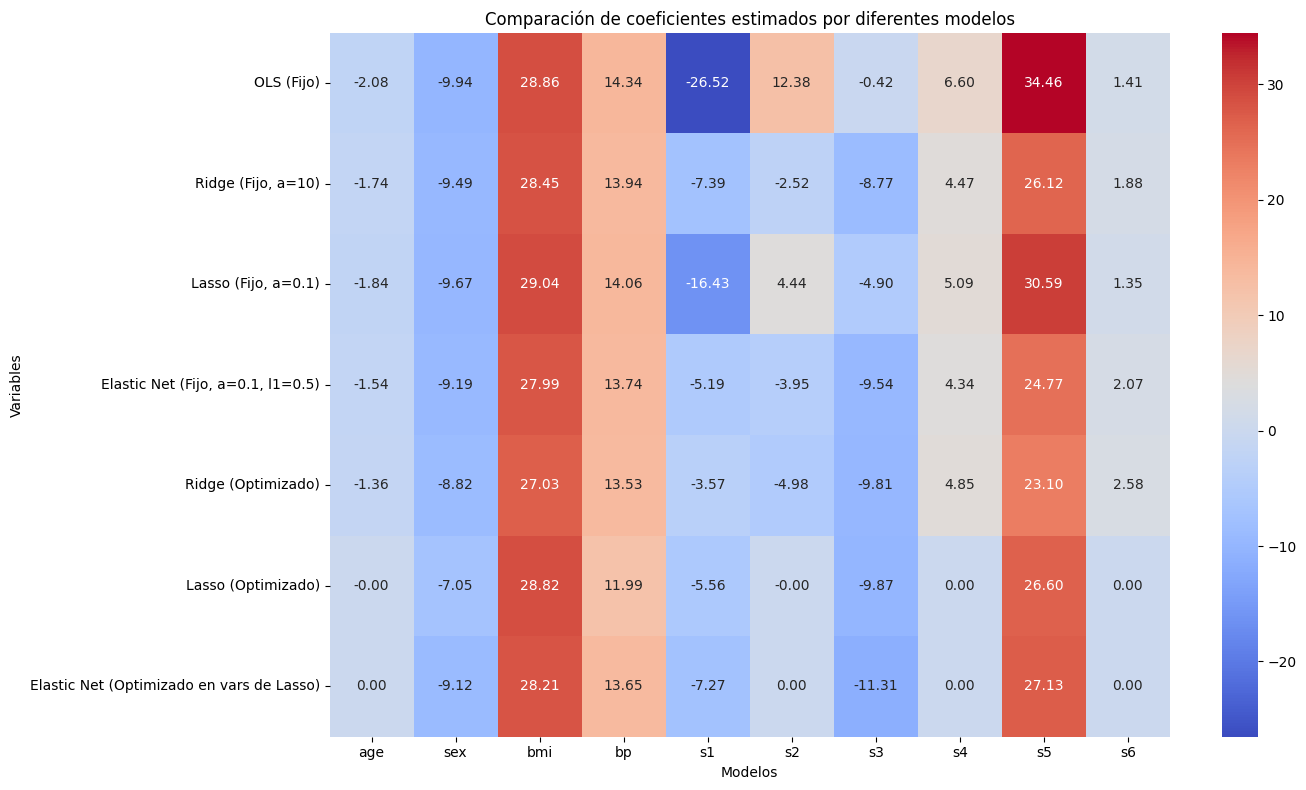

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener los nombres de las características
feature_names = diabetes.feature_names

# Extraer coeficientes de los modelos
# OLS - statsmodels (excluir la constante)
ols_coef = ols_sm.params[1:]

# Ridge (Fijo) - alpha=10.0
ridge_fijo_coef = ridge_fijo.coef_

# Lasso (Fijo) - alpha=0.1
lasso_fijo_coef = lasso_fijo.coef_

# Elastic Net (Fijo) - alpha=0.1, l1_ratio=0.5
enet_fijo_coef = enet_fijo.coef_

# Ridge (Optimizado) - usando mejor_alpha
ridge_optimo_coef = ridge_optimo.coef_

# Lasso (Optimizado) - usando mejor_alpha_lasso
lasso_optimo_coef = lasso_optimo.coef_

# Elastic Net (Optimizado) - entrenado en variables de Lasso
# enet_optimo ya está ajustado en el subconjunto de variables de Lasso en la celda 09c24dcd
# Necesitamos mapear estos coeficientes a las 10 variables originales para la visualización
# Creamos un array de ceros y llenamos las posiciones correspondientes a las variables seleccionadas por Lasso
enet_optimo_full_coef = np.zeros(len(feature_names))
selected_features_mask = lasso_optimo.coef_ != 0 # Usamos la máscara de Lasso para identificar las variables
enet_optimo_full_coef[selected_features_mask] = enet_optimo.coef_


# Crear un DataFrame para facilitar la visualización
coef_df = pd.DataFrame({
    'OLS (Fijo)': ols_coef,
    'Ridge (Fijo, a=10)': ridge_fijo_coef,
    'Lasso (Fijo, a=0.1)': lasso_fijo_coef,
    'Elastic Net (Fijo, a=0.1, l1=0.5)': enet_fijo_coef,
    'Ridge (Optimizado)': ridge_optimo_coef,
    'Lasso (Optimizado)': lasso_optimo_coef,
    'Elastic Net (Optimizado en vars de Lasso)': enet_optimo_full_coef
}, index=feature_names)

# Transponer el DataFrame para graficar fácilmente
coef_df_transposed = coef_df.T

# Graficar los coeficientes
plt.figure(figsize=(14, 8))
sns.heatmap(coef_df_transposed, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Comparación de coeficientes estimados por diferentes modelos")
plt.xlabel("Modelos")
plt.ylabel("Variables")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()